In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import pycarrot as pc

%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

sns.set_theme()

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data = load_breast_cancer(as_frame=True)
df = pd.concat([data.data, data.target], axis=1)
# df = df.query("target < 2").reset_index(drop=True)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [3]:
df.shape

(569, 31)

In [4]:
pc.feat_analysis.get_distribution(df)

COLUMN: mean radius
-----------------------------
Dtype: float64
Unique values: 456
np.nan count: 0
Most common values: [12.34 11.71 12.46 13.05 10.26]

COLUMN: mean texture
-----------------------------
Dtype: float64
Unique values: 479
np.nan count: 0
Most common values: [20.52 16.85 16.84 19.83 14.93]

COLUMN: mean perimeter
-----------------------------
Dtype: float64
Unique values: 522
np.nan count: 0
Most common values: [ 82.61  87.76 134.7   93.97  82.69]

COLUMN: mean area
-----------------------------
Dtype: float64
Unique values: 539
np.nan count: 0
Most common values: [ 512.2 1075.   582.7  399.8  641.2]

COLUMN: mean smoothness
-----------------------------
Dtype: float64
Unique values: 474
np.nan count: 0
Most common values: [0.1007 0.115  0.1054 0.1075 0.1063]

COLUMN: mean compactness
-----------------------------
Dtype: float64
Unique values: 537
np.nan count: 0
Most common values: [0.1147  0.1206  0.07698 0.05743 0.03834]

COLUMN: mean concavity
-----------------------

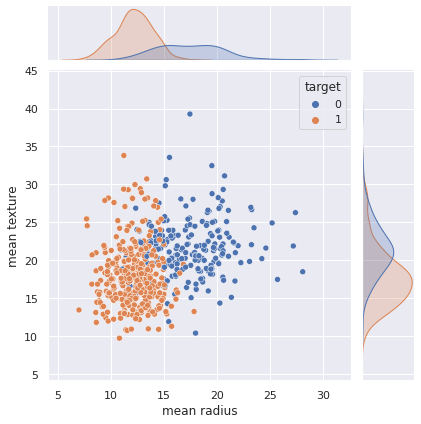

In [9]:
sns.jointplot(data=df, x="mean radius", y="mean texture", hue="target")

## Training

In [10]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [11]:
config = pc.init_config("./config.yml")
config

{'modelling': {'target_clf': 'target',
  'numeric_cols': ['mean radius',
   'mean texture',
   'mean perimeter',
   'mean area',
   'mean smoothness',
   'mean compactness',
   'mean concavity',
   'mean concave points',
   'mean symmetry',
   'mean fractal dimension',
   'radius error',
   'texture error',
   'perimeter error',
   'area error',
   'smoothness error',
   'compactness error',
   'concavity error',
   'concave points error',
   'symmetry error',
   'fractal dimension error',
   'worst radius',
   'worst texture',
   'worst perimeter',
   'worst area',
   'worst smoothness',
   'worst compactness',
   'worst concavity',
   'worst concave points',
   'worst symmetry',
   'worst fractal dimension']}}

In [12]:
setup, X_sample, y_sample = pc.modelling.prepare_data(
    train_data=df,
    config=config,
)

In [13]:
metric = "f1"

In [14]:
compare_df, model_dict = pc.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        "dt",
        "rf",
        "ridge",
        "perceptron",
        "passive-aggressive",
        "extratree",
        "extratrees",
        "knn",
        "nb",
        "linearsvc",
        "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

/home/george/Desktop/pycarrot/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/george/Desktop/pycarrot/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s)
0,extratrees,0.967,0.964,0.983,0.974,0.994,0.594
1,rf,0.963,0.965,0.978,0.971,0.99,1.056
2,ridge,0.954,0.939,0.992,0.965,0.991,0.029
3,lr,0.947,0.948,0.969,0.958,0.991,0.189
4,nb,0.939,0.936,0.969,0.952,0.987,0.015
5,knn,0.928,0.929,0.961,0.944,0.96,0.008
6,extratree,0.919,0.936,0.935,0.935,0.914,0.01
7,rbfsvc,0.912,0.893,0.98,0.934,0.974,0.037
8,linearsvc,0.916,0.923,0.949,0.934,0.978,0.118
9,dt,0.914,0.941,0.922,0.931,0.911,0.034


In [11]:
model_dict

{'lr': LogisticRegression(),
 'dt': DecisionTreeClassifier(),
 'rf': RandomForestClassifier(),
 'ridge': RidgeClassifier(),
 'perceptron': Perceptron(),
 'passive-aggressive': PassiveAggressiveClassifier(),
 'extratree': ExtraTreeClassifier(),
 'extratrees': ExtraTreesClassifier(),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'linearsvc': LinearSVC(),
 'rbfsvc': SVC()}

In [16]:
algorithm, reference_metric = compare_df.loc[compare_df["algorithm"] == "extratrees", ["algorithm", metric]].values[0]
best_feature_list = pc.modelling.reduce_feature_space(setup, algorithm, metric, reference_metric, acceptable_loss=0.5)
best_feature_list

New metric: 0.979, worst feature: area error
Updating reference metric...
New metric: 0.981, worst feature: mean fractal dimension
Updating reference metric...
New metric: 0.979, worst feature: mean concave points
New metric: 0.981, worst feature: texture error
New metric: 0.982, worst feature: symmetry error
Updating reference metric...
New metric: 0.979, worst feature: worst radius
New metric: 0.98, worst feature: mean symmetry
New metric: 0.979, worst feature: worst symmetry
New metric: 0.979, worst feature: worst concave points
New metric: 0.979, worst feature: concavity error
New metric: 0.979, worst feature: mean perimeter
New metric: 0.979, worst feature: mean compactness
New metric: 0.983, worst feature: worst fractal dimension
Updating reference metric...
New metric: 0.982, worst feature: mean area
New metric: 0.982, worst feature: concave points error
New metric: 0.982, worst feature: worst compactness
New metric: 0.985, worst feature: worst perimeter
Updating reference metri

['mean texture',
 'mean smoothness',
 'mean concavity',
 'perimeter error',
 'smoothness error',
 'compactness error',
 'fractal dimension error',
 'worst texture',
 'worst area',
 'worst smoothness',
 'worst concavity']